# Test 9: t-test for two population means (variances unknown and unequal)


## Objective

- To investigate the significance of the difference between the means of two populations

## Assumptions

- The great thing about this test is that we need to know nothing about the variance of the original 2 populations
    - If we know the variance of the populations, use **Test 3: Z-test for two population means** 

- The test is approximate if the populations are normally distributed / if the sample sizes are sufficiently large

- The test **can only be used as two tail test**

## Method

- You have two populations with means $\mu_1$ and $\mu_2$
- Take a sample from each population of size $n_1$ and $n_2$
- Use this to compute sample means $\bar{x_1}$ and $\bar{x_2}$
- Use this to compute sample variance 
$$\begin{aligned}
    s_1^2 &= \frac{\sum_{i=1}^{n_1} (x_i - \bar{x_1})^2}{n_1 - 1} \\
    s_2^2 &= \frac{\sum_{i=1}^{n_1} (x_i - \bar{x_2})^2}{n_2 - 1} \\
\end{aligned}$$

- Finally, compute the test statistic using

$$\begin{aligned}
    t &= \frac{(\bar{x_1} - \bar{x_2}) - (\mu_1 - \mu_2)}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
\end{aligned}$$

- The test statistic follows a students' t-distribution with degrees of freedom given by:

$$\begin{aligned}
    v &= \frac{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^2}{\frac{s_1^4}{n_1^2 \cdot (n_1 -1)} + \frac{s_2^4}{n_2^2 \cdot (n_2 - 1)}}
\end{aligned}$$

## Example

- Problem
    - Two financial organizations are about to merge and, as part of the rationalization process, some consideration is to be made of service duplication. 
    - Two sales teams responsible for identical products are compared by selecting samples from each and reviewing their respective profit contribution levels per employee over two weeks 
    - Assume the population means $\mu_1 = \mu_2$ are equal
    - The sample sizes are $n_1 = 4$ and $n_2 = 9$
    - The sample means are $x_1 = 3166$ and $x_2 = 2240$ 
    - The sample variances are $s_1^2 = 6328.27$ and $s_2^2 = 221661.3$

- Question
    - Are the means significantly different?
    - Remember, only 2 tail test possible
    

In [6]:
mu1 = mu2 = 0
n1=4
n2=9
xbar1 = 3166
xbar2 = 2240
s1_sq = 6328.27
s2_sq = 221661.3

def compute_test_statistic(xbar1, xbar2, mu1, mu2, s1_sq, s2_sq, n1, n2):
    return ((xbar1-xbar2) - (mu1-mu2)) / ((s1_sq/n1 + s2_sq/n2)**0.5)

compute_test_statistic(xbar1, xbar2, mu1, mu2, s1_sq, s2_sq, n1, n2)

def compute_degrees_of_freedom(s1_sq, s2_sq, n1, n2):
    numerator = (s1_sq/n1 + s2_sq/n2)**2
    denom1 = s1_sq**2 / (n1**2 * (n1-1))
    denom2 = s2_sq**2 / (n2**2 * (n2-1))
    return numerator / (denom1 + denom2)

compute_degrees_of_freedom(s1_sq, s2_sq, n1, n2)

8.96217028679

## Proof by simulation that test statistic is t-distribution

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Assume equal mean and variance under null hypothesis
POPULATION_MEAN_1 = 5
POPULATION_MEAN_2 = 5
UNKNOWN_POPULATION_SIGMA_1 = 2
UNKNOWN_POPULATION_SIGMA_2 = 3
SAMPLE_SIZE_1 = 100
SAMPLE_SIZE_2 = 234

def compute_sample_mean_and_variance(population_mean, unknown_population_sigma, sample_size):
    sample = np.random.normal(population_mean, unknown_population_sigma, sample_size)
    
    sample_mean = np.mean(sample)
    sample_variance = np.sum((sample - sample_mean)**2)/(sample_size-1)

    return sample_mean, sample_variance

tuples_1 = [compute_sample_mean_and_variance(POPULATION_MEAN_1, UNKNOWN_POPULATION_SIGMA_1, SAMPLE_SIZE_1) for _ in range(10_000)]
tuples_2 = [compute_sample_mean_and_variance(POPULATION_MEAN_2, UNKNOWN_POPULATION_SIGMA_2, SAMPLE_SIZE_2) for _ in range(10_000)]

sample_means_1 = np.array([x[0] for x in tuples_1])
sample_variance_1 = np.array([x[1] for x in tuples_1])
sample_means_2 = np.array([x[0] for x in tuples_2])
sample_variance_2 = np.array([x[1] for x in tuples_2])

-0.0013257590857750571
1.0280974069235933


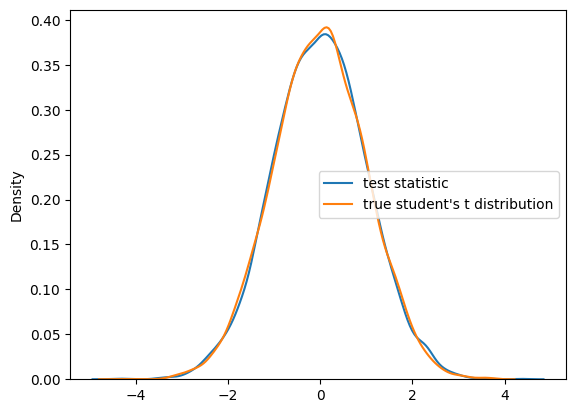

In [4]:
test_statistic_distribution = (
    ((sample_means_1 - sample_means_2) - (POPULATION_MEAN_1 - POPULATION_MEAN_2)) / ((sample_variance_1/SAMPLE_SIZE_1 + sample_variance_2/SAMPLE_SIZE_2)**0.5)
)

def degrees_of_freedom():
    numerator = (sample_variance_1/SAMPLE_SIZE_1 + sample_variance_2/SAMPLE_SIZE_2)**2
    denom1 = sample_variance_1**2 / ((SAMPLE_SIZE_1**2) * (SAMPLE_SIZE_1 - 1))
    denom2 = sample_variance_2**2 / ((SAMPLE_SIZE_2**2) * (SAMPLE_SIZE_2 - 1))
    return numerator / (denom1 + denom2)

degrees_of_freedom = degrees_of_freedom()
true_students_t_distribution = np.random.standard_t(degrees_of_freedom, 10_000)

print(test_statistic_distribution.mean())
print(test_statistic_distribution.var())
sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_students_t_distribution, label="true student's t distribution")
plt.legend()
# test_statistic_distribution